# Breast Cancer Detection using Support Vector Machine (SVM)

This notebook builds a Support Vector Machine (SVM) model to classify breast cancer tumors as **malignant (M)** or **benign (B)** using the **Breast Cancer Wisconsin Diagnostic Dataset (WDBC)**.

We'll go through the following steps:
1. Importing libraries and loading the dataset  
2. Exploratory data analysis (EDA)  
3. Data preprocessing and feature scaling  
4. Model training and evaluation using SVM  
5. Hyperparameter tuning with GridSearchCV  
6. Conclusion and insights

## 1. Importing Libraries and Loading the Dataset

We start by importing the essential Python libraries for data analysis, visualization, and machine learning.  
Then we load the dataset and assign descriptive column names for easier interpretation.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
column_names = [
    "ID", "Diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
    "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

df = pd.read_csv("./breastCancerData/wdbc.data", header = None, names = column_names)

In [26]:
df

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 2. Exploratory Data Analysis (EDA)

We visualize the dataset to understand:
- The distribution of diagnosis labels (Benign vs Malignant)
- Relationships between key features
- Correlations between all numerical features


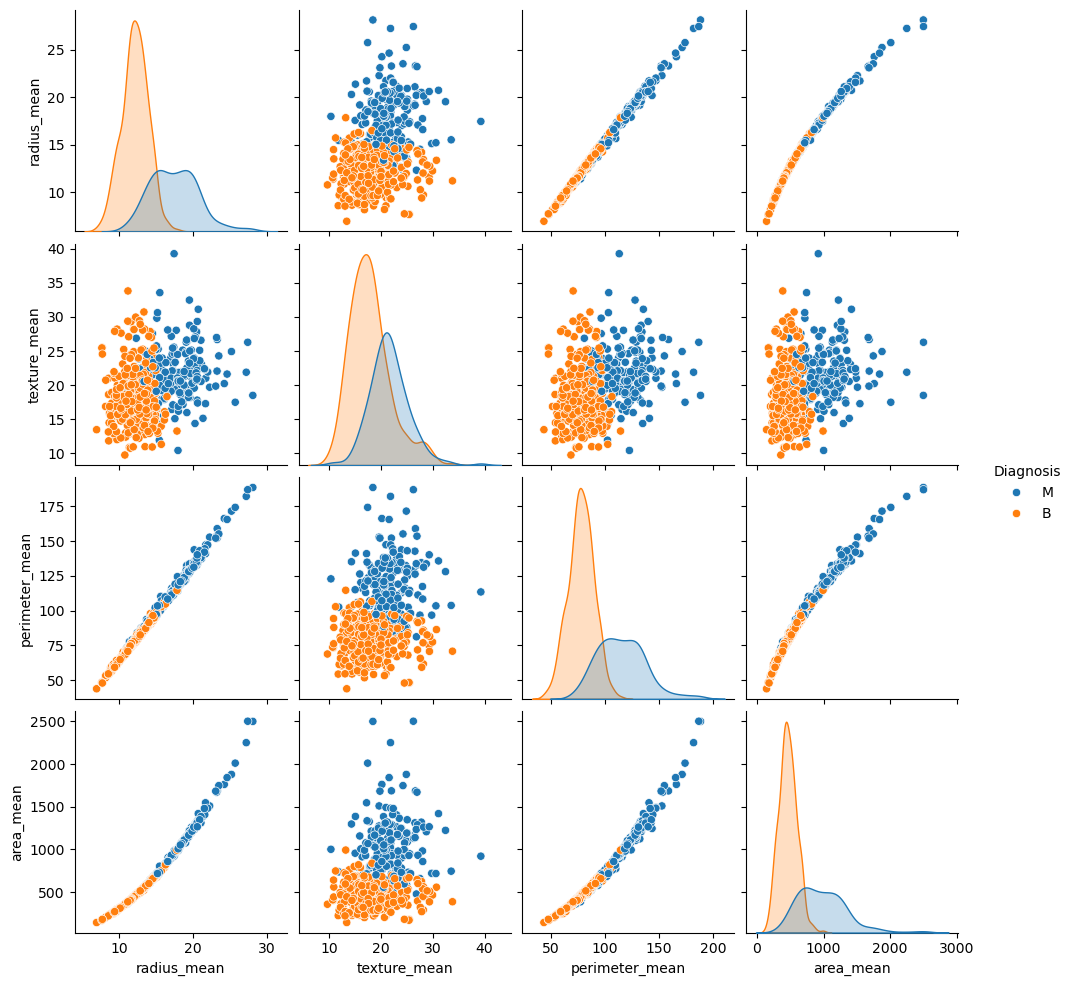

In [27]:

sns.pairplot(df, hue = "Diagnosis", vars = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean"])


<Axes: >

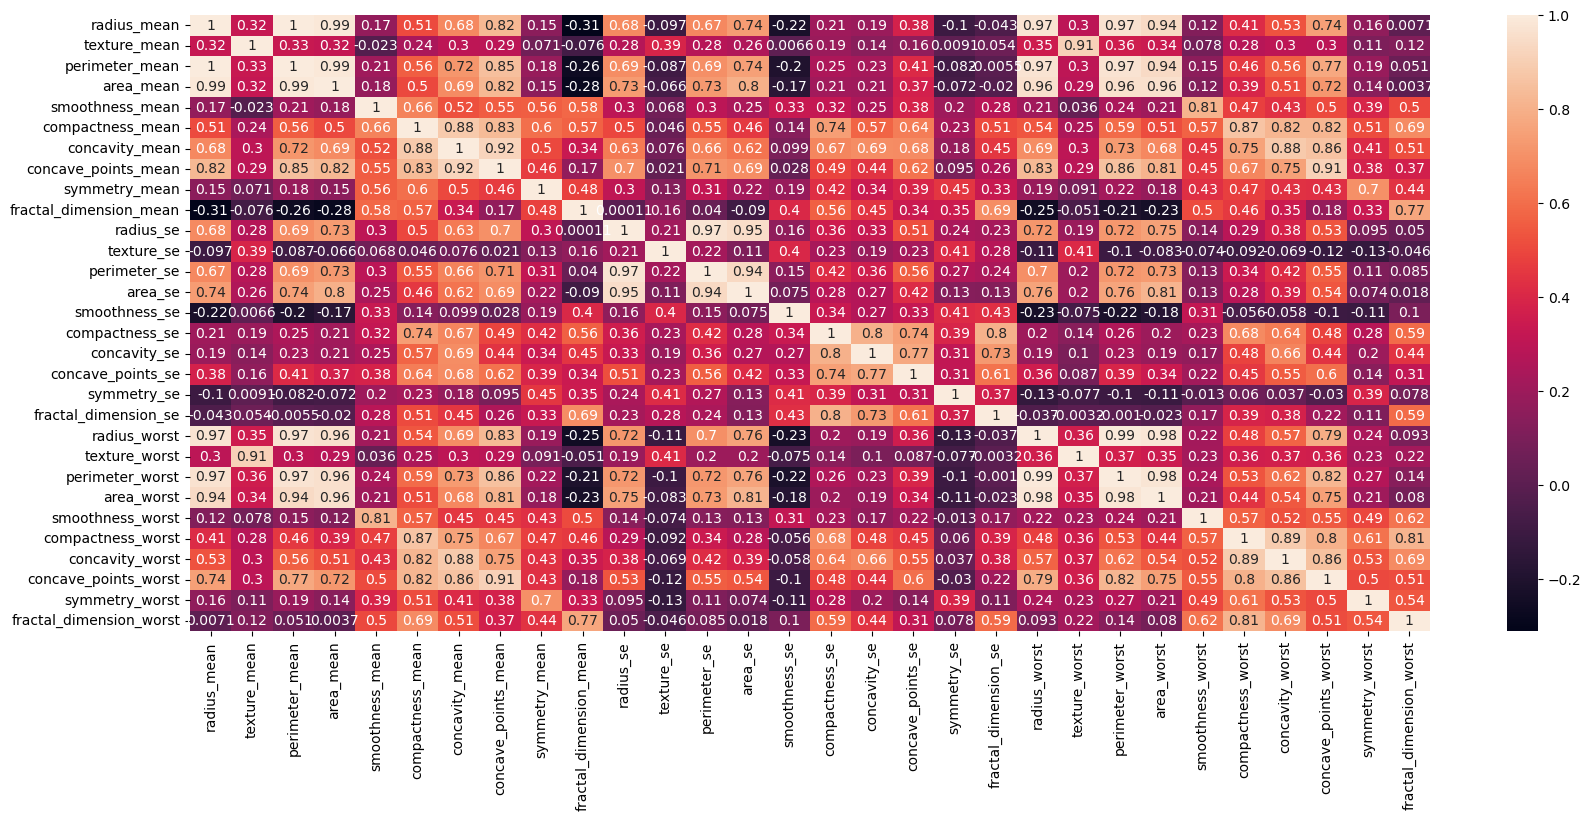

In [28]:
plt.figure(figsize = (20,8))
sns.heatmap(df.drop(["ID","Diagnosis"], axis = 1).corr(), annot = True)

<Axes: xlabel='count', ylabel='Diagnosis'>

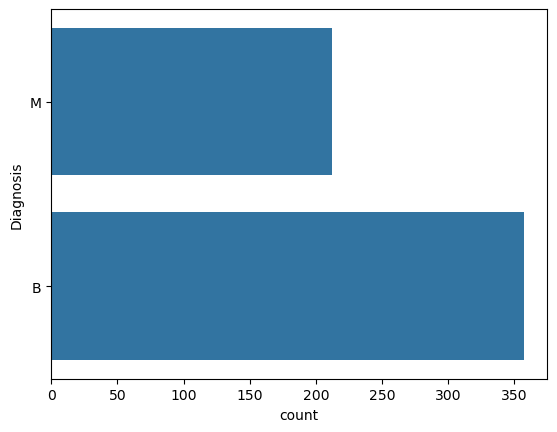

In [29]:
sns.countplot(df["Diagnosis"])

## 3. Data Preparation

We prepare the data by:
- Dropping irrelevant columns (`ID`)
- Encoding the target variable (`Diagnosis`) where:
  - **M (Malignant)** → 1  
  - **B (Benign)** → 0  
- Splitting the data into training and testing sets.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [31]:
X = df.drop(["ID", "Diagnosis"], axis = 1)
y = df["Diagnosis"].map({"M": 1, "B": 0})

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=19)

## 4. Baseline Model — Support Vector Classifier (SVC)

We train an initial SVM model using default parameters to establish a baseline for performance comparison.


In [33]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [34]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[110   3]
 [ 17  58]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       113
           1       0.95      0.77      0.85        75

    accuracy                           0.89       188
   macro avg       0.91      0.87      0.88       188
weighted avg       0.90      0.89      0.89       188



## 5. Feature Scaling

SVMs are sensitive to the scale of input features.  
We standardize the dataset using `StandardScaler` to improve model performance and consistency.


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Hyperparameter Tuning — GridSearchCV

We optimize SVM hyperparameters using `GridSearchCV` to find the best combination of:
- Regularization parameter `C`
- Kernel coefficient `gamma`
- Kernel type (RBF)


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001], "kernel": ["rbf"]}
svc_model = SVC()
grid = GridSearchCV(svc_model, params, refit = True)


In [38]:
from sklearn import set_config
set_config(display='text')

In [39]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [40]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

## 7. Final Model Evaluation

Using the best hyperparameters from GridSearchCV, we evaluate the model on the test set and visualize its confusion matrix.


In [41]:
y_pred = grid.predict(X_test_scaled)

<Axes: >

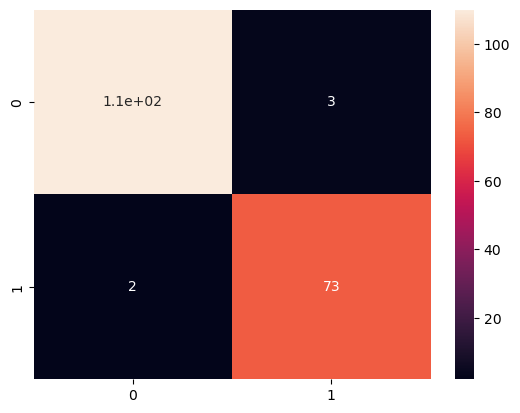

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       113
           1       0.96      0.97      0.97        75

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [44]:
confusion_matrix(y_test, y_pred)

array([[110,   3],
       [  2,  73]])

## 8. Conclusion

The Support Vector Machine (SVM) model achieved strong classification results:

| Metric | Benign (0) | Malignant (1) |
|--------|-------------|---------------|
| Precision | 0.98 | 0.96 |
| Recall | 0.97 | 0.97 |
| F1-Score | 0.98 | 0.97 |

**Overall accuracy:** 0.97  
**Macro average F1-score:** 0.97

### Key Insights:
- The tuned SVM achieved excellent results, correctly classifying 97 % of cases.  
- Feature scaling and parameter tuning (C = 10, γ = 0.01) improved boundary separation and overall reliability, resulting in better generalization on the test set.
- The model demonstrates **high precision and recall** for both benign and malignant classes, indicating reliability.  


